# GRADIENT BOOSTING CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset.csv')
data.head()

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df=data.dropna()

In [4]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air_temperature ', 'Process_temperature ',
       'Rotational_speed ', 'Torque ', 'Tool_wear ', 'Target', 'Failure_Type'],
      dtype='object')

In [5]:
df.head()

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Type']=lab.fit_transform(df['Type'])

In [7]:
del df['UDI']
del df['Product ID']
del df['Type']
del df['Target']

In [8]:
x1 = df.drop(labels='Failure_Type', axis=1)
y1 = df.loc[:,'Failure_Type']

In [9]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({'No Failure': 9652, 'Heat Dissipation Failure': 112, 'Power Failure': 95, 'Overstrain Failure': 78, 'Tool Wear Failure': 45, 'Random Failures': 18})
OVER SAMPLING DATA COUNT  :  Counter({'No Failure': 9652, 'Power Failure': 9652, 'Tool Wear Failure': 9652, 'Overstrain Failure': 9652, 'Random Failures': 9652, 'Heat Dissipation Failure': 9652})


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912


In [11]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
GRB = GradientBoostingClassifier()
GRB.fit(x_train,y_train)

GradientBoostingClassifier()

In [14]:
predicted = GRB.predict(x_test)

In [15]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF GradientBoosting:\n\n',cr)

THE CLASSIFICATION REPORT OF GradientBoosting:

                           precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      1930
              No Failure       1.00      0.93      0.96      1930
      Overstrain Failure       0.99      1.00      0.99      1931
           Power Failure       0.99      1.00      1.00      1931
         Random Failures       0.99      1.00      1.00      1931
       Tool Wear Failure       0.96      1.00      0.98      1930

                accuracy                           0.99     11583
               macro avg       0.99      0.99      0.99     11583
            weighted avg       0.99      0.99      0.99     11583



In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF GradientBoosting:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF GradientBoosting:


 [[1930    0    0    0    0    0]
 [   2 1797   21   10   19   81]
 [   0    0 1931    0    0    0]
 [   0    0    0 1931    0    0]
 [   0    0    0    0 1931    0]
 [   0    0    0    0    0 1930]]


In [17]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(GRB, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [98.57549858 95.83872917 95.77793127 97.56518736 99.06751856]


In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF GradientBoosting IS :",a*100)

THE ACCURACY SCORE OF GradientBoosting IS : 98.85176551843219


In [19]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF GradientBoosting IS :",hl*100)

THE HAMMING LOSS OF GradientBoosting IS : 1.148234481567815


THE CONFUSION MATRIX SCORE OF GradientBoosting:


[[1930    0    0    0    0    0]
 [   2 1797   21   10   19   81]
 [   0    0 1931    0    0    0]
 [   0    0    0 1931    0    0]
 [   0    0    0    0 1931    0]
 [   0    0    0    0    0 1930]]


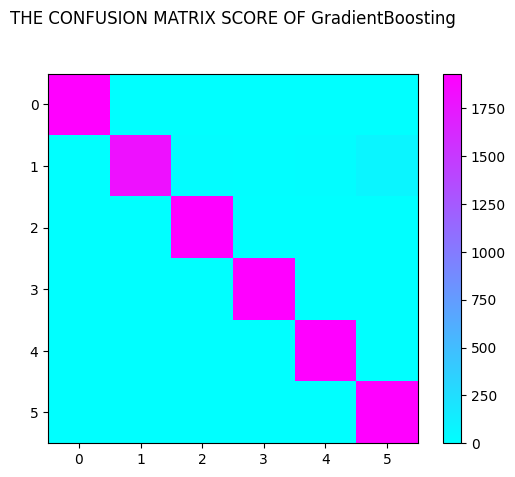

In [20]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF GradientBoosting\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF GradientBoosting:\n\n')
print(cm)
plot_confusion_matrix(cm)

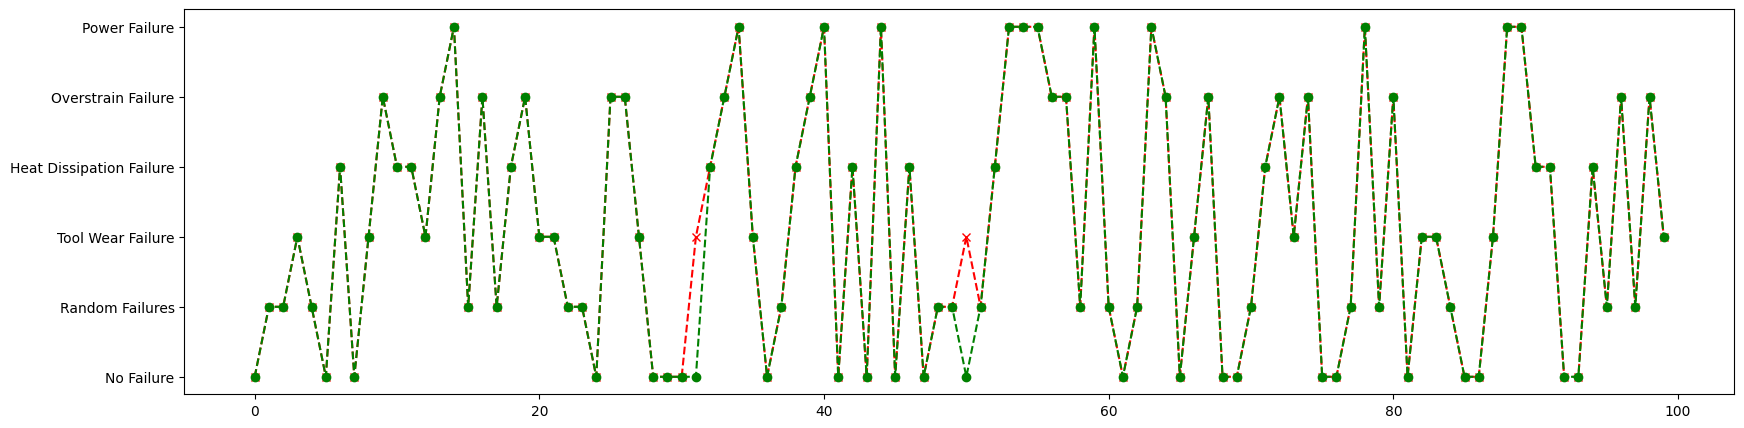

In [21]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()